In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '5'
from keras import layers
from keras import models

Using TensorFlow backend.
/data/bitt/wzq/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/bitt/wzq/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/bitt/wzq/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/bitt/wzq

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [3]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [4]:
from keras import optimizers

In [5]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_dir = r"/data/bitt/wzq/wzq/python-deep-learning/data/cats_and_dogs_small/train"
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [8]:
validation_dir = r"/data/bitt/wzq/wzq/python-deep-learning/data/cats_and_dogs_small/validation"
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [9]:
for data_batch, labels_batch in train_generator:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [10]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)


Epoch 1/30
100/100 [==============================] - 42s 417ms/step - loss: 0.6848 - acc: 0.5445 - val_loss: 0.6716 - val_acc: 0.6080
Epoch 2/30
100/100 [==============================] - 41s 411ms/step - loss: 0.6560 - acc: 0.6070 - val_loss: 0.6756 - val_acc: 0.6210
Epoch 3/30
100/100 [==============================] - 40s 396ms/step - loss: 0.6028 - acc: 0.6750 - val_loss: 0.6423 - val_acc: 0.6520
Epoch 4/30
100/100 [==============================] - 39s 387ms/step - loss: 0.5685 - acc: 0.6980 - val_loss: 0.7409 - val_acc: 0.6710
Epoch 5/30
100/100 [==============================] - 40s 401ms/step - loss: 0.5426 - acc: 0.7160 - val_loss: 0.5772 - val_acc: 0.6920
Epoch 6/30
100/100 [==============================] - 39s 394ms/step - loss: 0.5133 - acc: 0.7400 - val_loss: 0.6057 - val_acc: 0.7010
Epoch 7/30
100/100 [==============================] - 41s 407ms/step - loss: 0.4880 - acc: 0.7550 - val_loss: 0.5251 - val_acc: 0.6890
Epoch 8/30
100/100 [==============================] - 

In [11]:
model.save('cats_and_dogs_small.h5')

In [12]:
import matplotlib.pyplot as plt

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [14]:
epoches = range(1, len(acc) + 1)

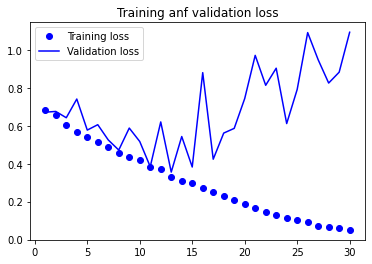

In [15]:
plt.plot(epoches, loss, 'bo', label='Training loss')
plt.plot(epoches, val_loss, 'b', label='Validation loss')
plt.title("Training anf validation loss")
plt.legend()
plt.show()

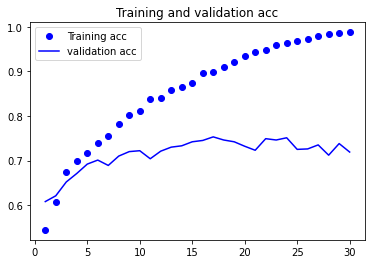

In [16]:
plt.plot(epoches, acc, 'bo', label='Training acc')
plt.plot(epoches, val_acc, 'b', label='validation acc')
plt.title('Training and validation acc')
plt.legend()
plt.show()

In [17]:
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

In [18]:
from keras.preprocessing import image

In [19]:
train_cats_dir = "./data/cats_and_dogs_small/train/cats"
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

In [20]:
img_path = fnames[100]

In [21]:
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)

In [22]:
x = x.reshape((1, ) + x.shape)

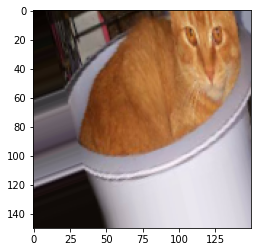

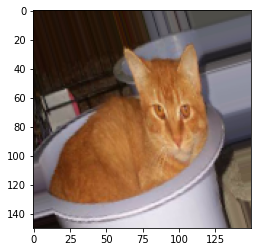

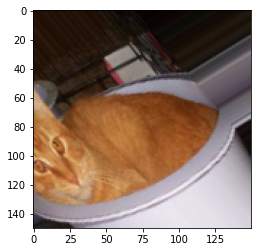

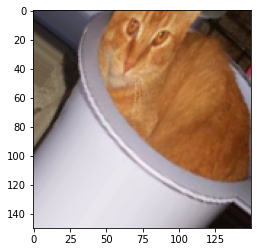

In [23]:
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i % 4 == 0:
        break
plt.show()